In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv('datasets/Pokemon.csv', encoding='unicode_escape')
sns.set_style('darkgrid')


In [38]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


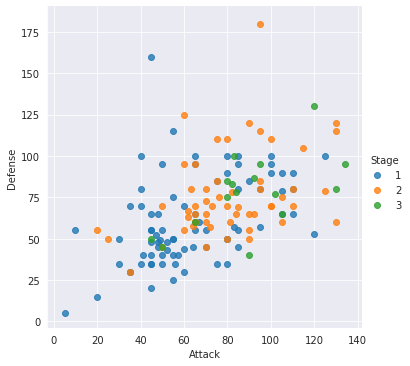

In [39]:
# Plot with linear regression
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage)
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

(0, 141.98905736873428)

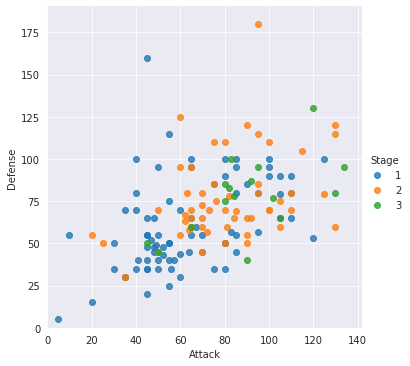

In [40]:
# Tweak axes limits: note has to be done in this order

# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)


In [35]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary', '#'], axis=1)


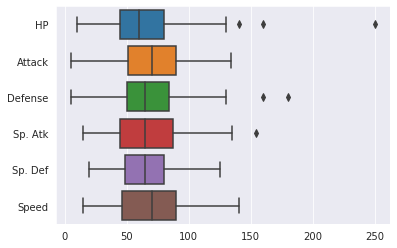

In [45]:
# New boxplot using stats_df
sns.boxplot(data=stats_df, orient='h')


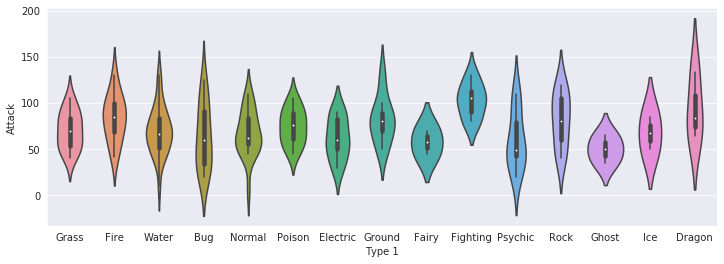

In [53]:
# Violin plots - alternative to box 

# Set size like this
plt.figure(figsize=(12,4))
sns.violinplot(x='Type 1', y='Attack', data=df)


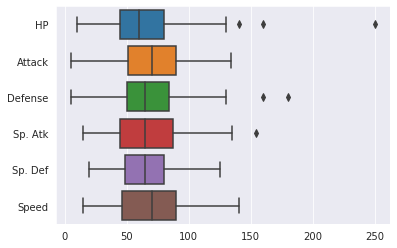

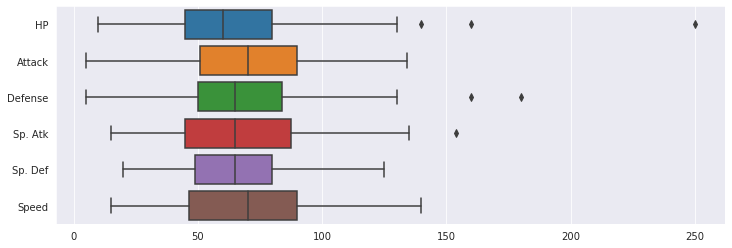

In [55]:
# Note the plt.figure only affects the NEXT chart
sns.boxplot(data=stats_df, orient='h')

plt.figure(figsize=(12,4))
sns.boxplot(data=stats_df, orient='h')


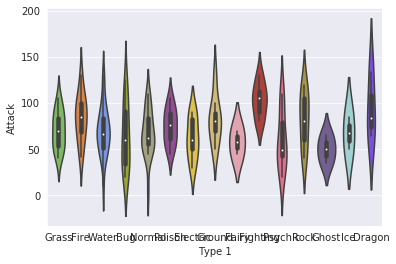

In [56]:
# Adjust colours
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette


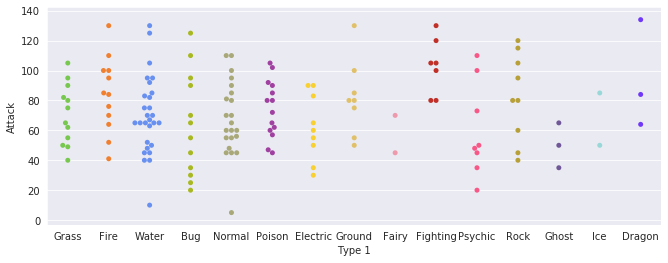

In [61]:
plt.figure(figsize=(11,4))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

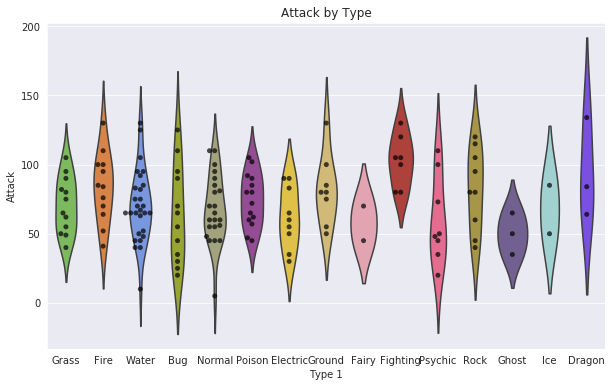

In [74]:
# Plots can be combined. A little confusing when they start and stop: https://stackoverflow.com/questions/36018681/stop-seaborn-plotting-multiple-figures-on-top-of-one-another

plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
    
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [75]:


melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


/home/pidge/miniconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pidge/miniconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pidge/miniconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pidge/miniconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


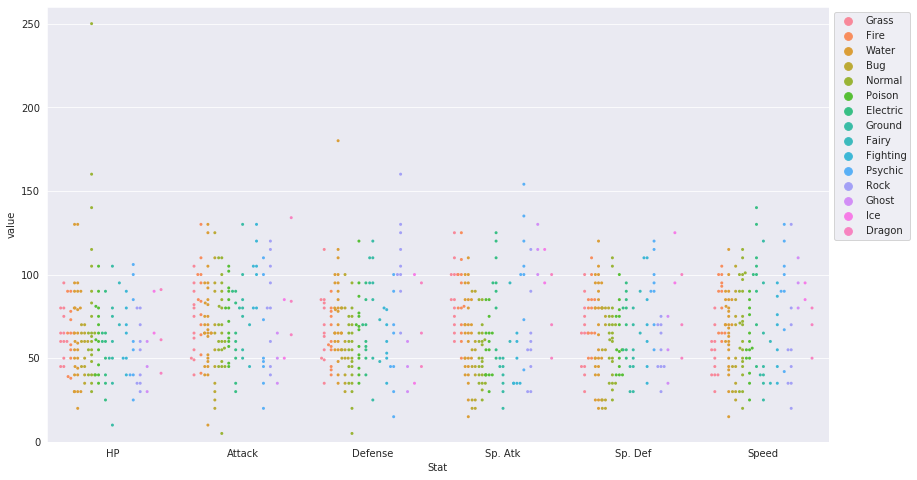

In [85]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='Stat', y='value', data=melted_df, dodge=True,
              hue='Type 1', s=3)

# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)


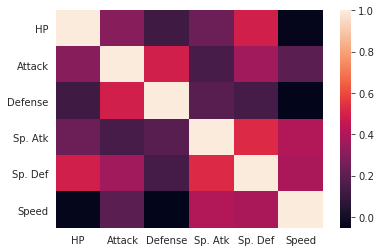

In [86]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)


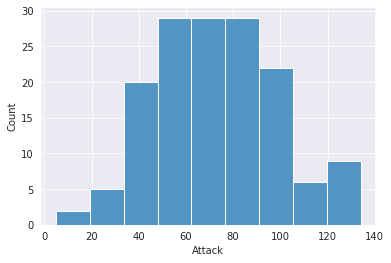

In [90]:
sns.histplot(df.Attack)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

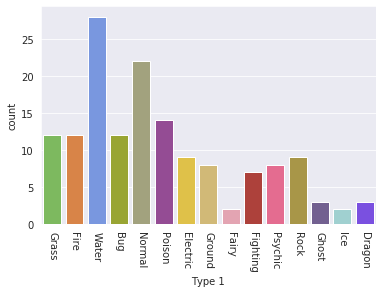

In [93]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-90)
